In [19]:
!pip install -qU pandas-profiling

In [50]:
# for data manipulation
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

In [45]:
accidents = pd.read_csv('accidents_description.csv')
health = pd.read_csv('health_database.csv')

In [15]:
#Begin Data Exploration
health.shape

(439, 9)

In [49]:
health.profile_report()

In [25]:
health.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [47]:
health.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee ou Terceiro',
       'Risco Critico'],
      dtype='object')

In [48]:
#Rename the columns 
health.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee ou Terceiro':'Employee type', 'Risco Critico':'Critical risk'}, inplace=True)
health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical risk
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [53]:
#For time series analysis
health['Date'] = pd.to_datetime(health['Date'])
health['Year'] = health['Date'].apply(lambda x : x.year)
health['Month'] = health['Date'].apply(lambda x : x.month)
health['Day'] = health['Date'].apply(lambda x : x.day)
health['Weekday'] = health['Date'].apply(lambda x : x.day_name())

In [54]:
country_mapping = {
    'Country_01': 1,
    'Country_02': 2,
    'Country_03': 3
}

health['Country'] = health['Country'].replace(country_mapping)

In [66]:
# Define a dictionary to map months to seasons
#In Southern Hemisphere
month_to_season = {
    12: 'Summer',
    1: 'Summer',
    2: 'Summer',
    3: 'Automn',
    4: 'Automn',
    5: 'Automn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring'
}

# Map the months to seasons using the dictionary
health['Season'] = health['Month'].map(month_to_season)

In [68]:
health.head(4)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical risk,Year,Month,Day,Weekday,Season
0,2016-01-01,1,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,Summer
1,2016-01-02,2,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,Summer
2,2016-01-06,1,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,Summer
3,2016-01-08,1,Local_04,Mining,I,I,Male,Third Party,Others,2016,1,8,Friday,Summer


In [70]:
#Another check for nulls
health.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical risk               0
Year                        0
Month                       0
Day                         0
Weekday                     0
Season                      0
dtype: int64

In [75]:
health.duplicated().sum()

0

In [74]:
#Drop the dups
health.drop_duplicates(inplace = True)

In [77]:
health['Critical risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Pressurized Systems                            7
Fall prevention (same level)                   7
Bees                                           7
Suspended Loads                                6
Fall prevention                                6
Liquid Metal                                   3
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Not applicable                                 2
Machine Protection  

In [79]:
health['Weekday'].value_counts()

Thursday     73
Tuesday      68
Friday       63
Wednesday    62
Saturday     56
Monday       53
Sunday       41
Name: Weekday, dtype: int64

In [ ]:
#Time to get gritty

In [86]:
def simple_grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in health.select_dtypes(include='object').columns]
    num_cols = [col for col in health.select_dtypes(exclude='object').columns]

    num_but_cat = [col for col in num_cols if health[col].nunique() < cat_th]
    cat_cols += num_but_cat
    cat_cols = [col for col in cat_cols if health[col].nunique() <= car_th]

    cat_but_car = [col for col in cat_cols if health[col].nunique() > car_th]

    print(" RESULT ".center(60, '~'), "\n")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols) - len(num_but_cat)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}', "\n")
    print("".center(60, '~'))

    return cat_cols, num_cols, cat_but_car


In [87]:
cat_cols, num_cols, cat_but_car = simple_grab_col_names(health)

# Print the values
print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)
print("Categorical but Cardinal Columns:", cat_but_car)

~~~~~~~~~~~~~~~~~~~~~~~~~~ RESULT ~~~~~~~~~~~~~~~~~~~~~~~~~~ 

cat_cols: 10
num_cols: 3
cat_but_car: 0
num_but_cat: 2 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Categorical Columns: ['Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Gender', 'Employee type', 'Weekday', 'Season', 'Country', 'Year']
Numeric Columns: ['Date', 'Country', 'Year', 'Month', 'Day']
Categorical but Cardinal Columns: []


In [82]:
cat_cols

['Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Gender',
 'Employee type',
 'Weekday',
 'Season',
 'Country',
 'Year']

In [90]:
def check_classes(health):  
    dict = {}
    for i in list(health.columns):
        dict[i] = health[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq

check_classes(health)

,Unique Count
Date,287
Critical risk,34
Day,31
Local,12
Month,12
Weekday,7
Potential Accident Level,6
Accident Level,5
Season,4
Country,3


In [95]:
def grab_outliers(health, col_name, index=False):
    low, up = outlier_thresholds(health, col_name)
    outliers = health[(health[col_name] < low) | (health[col_name] > up)]
    
    if outliers.shape[0] > 0:
        if outliers.shape[0] > 10:
            print(outliers.head())
        else:
            print(outliers)
        
        if index:
            return outliers.index
    else:
        print(f"No outliers found in column '{col_name}'.")

# Assuming you have a DataFrame named 'health'
# If your DataFrame has a different name, replace 'health' with your DataFrame's name

num_cols = health.select_dtypes(include=['number']).columns

for col in num_cols:
    print(col, (outliers := grab_outliers(health, col)).shape[0] > 0)

No outliers found in column 'Country'.


AttributeError: 'NoneType' object has no attribute 'shape'

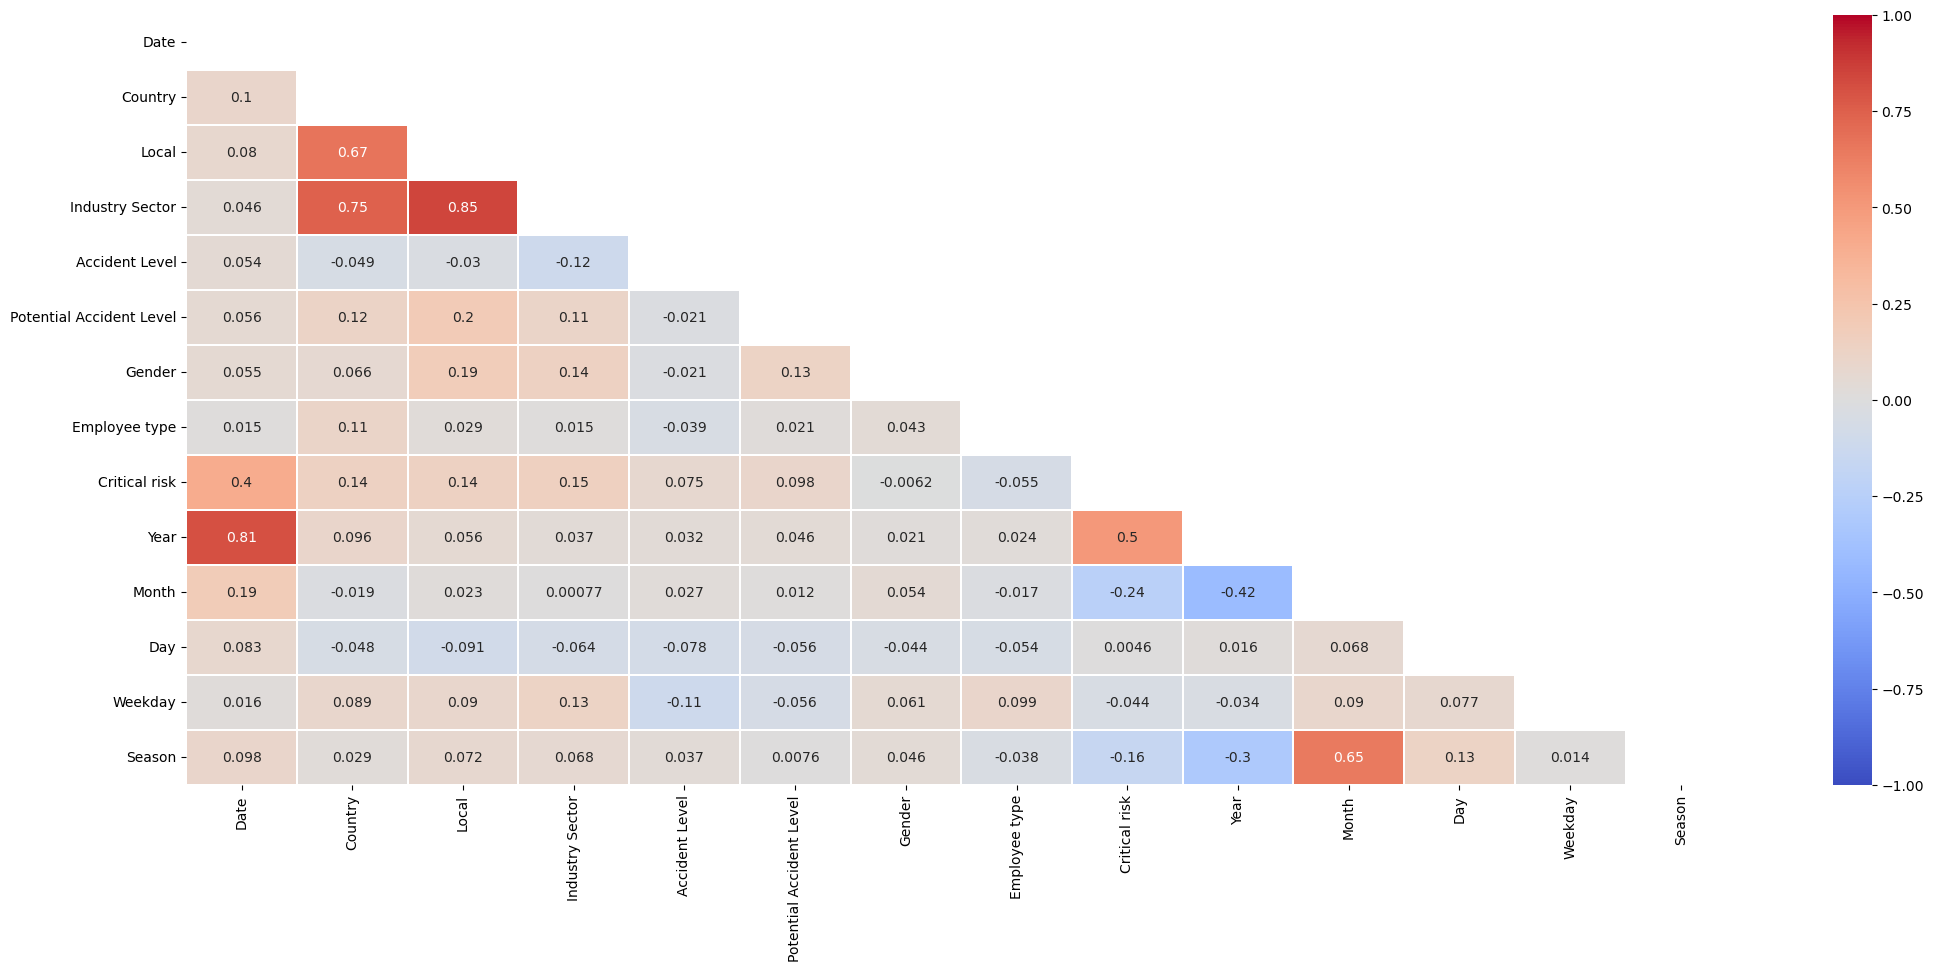

In [96]:
plt.figure(5, figsize=(25, 10))
corr = health.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [97]:
health.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical risk,Year,Month,Day,Weekday,Season
0,2016-01-01,1,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,Summer
1,2016-01-02,2,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,Summer
2,2016-01-06,1,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,Summer


In [212]:
column_types = model_health.dtypes
print(column_types)

Country                       int64
Local                         int64
Industry Sector               int64
Accident Level                int64
Potential Accident Level      int64
Gender                        int64
Year                          int64
Month                         int64
Day                           int64
Weekday                      object
Season                       object
Employeee type                int64
Critical risk_frequency     float64
dtype: object


In [188]:
#Time for model selection
from sklearn.model_selection import train_test_split

# Psuedo-dataset
#model_health = health.copy()
# Drop the first column by index (index 0)
#model_health = model_health.iloc[:, 1:]

#Define mapping to convert 'Local' values to numbers
local_mapping = {
    'Local_01': 1,
    'Local_02': 2,
    'Local_03': 3,
    'Local_04': 4,
    'Local_05': 5,
    'Local_06': 6,
    'Local_07': 7,
    'Local_08': 8,
    'Local_09': 9,
    'Local_10': 10,
    'Local_11': 11,
    'Local_12': 12,
}

model_health['Local'] = model_health['Local'].replace(local_mapping)



In [182]:
#Critical Risk
unique_critical_risks = model_health['Critical risk'].unique()
print(unique_critical_risks)

# Calculate the frequency of each unique value in 'Critical risk'
frequency_encoding = model_health['Critical risk'].value_counts(normalize=True).to_dict()

# Apply frequency encoding
model_health['Critical risk_frequency'] = model_health['Critical risk'].map(frequency_encoding)

# Drop the original 'Critical risk' column
model_health = model_health.drop(columns=['Critical risk'])

['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Not applicable'
 'Traffic' 'Projection' 'Venomous Animals' 'Plates' 'Projection/Burning'
 'remains of choco' 'Vehicles and Mobile Equipment' 'Projection/Choco'
 'Machine Protection' 'Power lock' 'Burn' 'Projection/Manual Tools'
 'Individual protection equipment' 'Electrical Shock'
 'Projection of fragments']


In [181]:
#Employee
unique_employee_types = model_health['Employee type'].unique()
print(unique_employee_types)

#Define mapping to convert 'Local' values to numbers
employee_mapping = {
    'Third Party': 1,
    'Employee': 2,
    'Third Party (Remote)': 3
}

model_health['Employeee type'] = model_health['Employee type'].replace(employee_mapping)
model_health = model_health.drop(columns=['Employee type'])

['Third Party' 'Employee' 'Third Party (Remote)']


In [179]:
#Industry
unique_industry_sector = model_health['Industry Sector'].unique()
print(unique_industry_sector)

#Define mapping to convert 'Local' values to numbers
industry_mapping = {
    'Mining': 1,
    'Metals': 2,
    'Others': 3
}

model_health['Industry Sector'] = model_health['Industry Sector'].replace(industry_mapping)
#model_health = model_health.drop(columns=['Industry Sector'])

['Mining' 'Metals' 'Others']


In [184]:
#Gender
#Define mapping to convert 'Local' values to numbers
gender_mapping = {
    'Male': 0,
    'Female': 1
}

model_health['Gender'] = model_health['Gender'].replace(gender_mapping)

In [196]:
#Accident Level 
unique_accident_level = model_health['Accident Level'].unique()
print(unique_accident_level)

#Define mapping to convert 'Local' values to numbers
accident_mapping = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5
}

model_health['Accident Level'] = model_health['Accident Level'].replace(accident_mapping)

['I' 'IV' 'III' 'II' 'V']


In [206]:
#Potential Accident Level 
unique_pot_accident_level = model_health['Potential Accident Level'].unique()
print(unique_pot_accident_level)

#Define mapping to convert 'Local' values to numbers
pot_accident_mapping = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5, 
    'VI':6
}

model_health['Potential Accident Level'] = model_health['Potential Accident Level'].replace(pot_accident_mapping)

[4 3 1 2 5 'VI']


In [214]:
#Weekday
unique_weekday = model_health['Weekday'].unique()
print(unique_weekday)

#Define mapping to convert 'Local' values to numbers
weekday_mapping = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5, 
    'Friday':6,
    'Saturday':7
}

model_health['Weekday'] = model_health['Weekday'].replace(weekday_mapping)

['Friday' 'Saturday' 'Wednesday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']


In [216]:
model_health = model_health.drop(columns=['Season'])

In [217]:
model_health.tail(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Year,Month,Day,Weekday,Employeee type,Critical risk_frequency
436,2,9,2,1,2,0,2017,7,5,4,2,0.031250
437,2,5,2,1,2,0,2017,7,6,5,2,0.033654
438,1,4,1,1,2,1,2017,7,9,1,1,0.016827


In [257]:
# Assuming your target variable is named 'target'
X = model_health.drop(columns=['Industry Sector'])  
y = model_health['Industry Sector']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize different algorithms
random_forest_model = RandomForestClassifier()
svm_model = SVC()
logistic_regression_model = LogisticRegression()

# Train Random Forest model
random_forest_model.fit(X_train, y_train)

# Train Support Vector Machine model
svm_model.fit(X_train, y_train)

# Train Logistic Regression model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [258]:
#Lets see how we did 
from sklearn.metrics import accuracy_score

# Predictions on validation set
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

y_pred_lr = logistic_regression_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Random Forest Accuracy:", accuracy_rf)
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Logistic Regression Accuracy:", accuracy_lr)

Random Forest Accuracy: 0.9880952380952381
Support Vector Machine Accuracy: 0.5238095238095238
Logistic Regression Accuracy: 0.9880952380952381


In [259]:
#Evaluating the RF
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Calculate and print precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Precision:", precision_rf)

# Calculate and print recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Recall:", recall_rf)

# Calculate and print F1-score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest F1-Score:", f1_rf)

Random Forest Accuracy: 0.9880952380952381
Random Forest Precision: 0.9885057471264369
Random Forest Recall: 0.9880952380952381
Random Forest F1-Score: 0.9879408666594022


In [260]:
#Fine-Tuning Time 
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

In [261]:
best_model = best_rf_model

In [262]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier using best models
ensemble_model = VotingClassifier(estimators=[('rf', best_rf_model), ('svm', svm_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svm', SVC())],
                 voting='soft')

In [263]:
# Document your chosen model and its performance
print("Chosen Model:", best_model)
print("Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

Chosen Model: RandomForestClassifier()
Accuracy: 1.0


In future research I would like to explore other alterations made to involving the categorical data (such as embedding or target encoding) because I have a hunch that those changes impacted the data. 

However, we were able to fine tune the RF with an increased accuracy of over 8% when predicting 'Local.'

I learned to not just trust a model's accuracy at face value, other metrics such as precision, recall, and f-1 score add elements to the story. 

In predicting from the categories with three values, RF and Log Reg seemed to just about always outperform SVM with an accuracy of well over 80%. When the parameters increased though, we saw the accuracy drop rather quickly. As mentioned, further research into this would involve better manipulation of the categorical variables and attempting other methods such as gradient boosting or neural networks. 